# Info

This notebook is a simple exploration of the cifar10 dataset using tensorflow. Building a model and training it using the cifar10 dataset. 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
These are the classes: 
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck

NB: The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

# Import Packs 

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load Data Set 

In [2]:
#Call dataset - cifar10 dataset = 10 different classifications to train 

In [3]:
classification = tf.keras.datasets.cifar10

# Train, Test Split 

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = classification.load_data()

In [5]:
# view the shape of x_train - 50,000 images each 32x32 
x_train.shape

(50000, 32, 32, 3)

In [6]:
# view the shape of x_test - 10,000 images each 32x32 
x_test.shape

(10000, 32, 32, 3)

## View Arrays before Normalization of the data 

In [45]:
#Before normalization the values are normally between 0-255 representing pixel intensity.View x_train image 43 pixels 
x_train[43]

array([[[ 99, 166, 198],
        [ 98, 165, 196],
        [100, 167, 199],
        ...,
        [129, 186, 212],
        [132, 190, 215],
        [130, 188, 213]],

       [[100, 166, 195],
        [100, 164, 194],
        [102, 167, 197],
        ...,
        [122, 152, 169],
        [135, 189, 213],
        [132, 188, 214]],

       [[104, 169, 197],
        [104, 167, 195],
        [106, 170, 198],
        ...,
        [165, 165, 160],
        [149, 189, 205],
        [140, 189, 212]],

       ...,

       [[195, 173, 149],
        [199, 177, 153],
        [221, 194, 166],
        ...,
        [209, 191, 169],
        [209, 190, 171],
        [208, 188, 173]],

       [[197, 173, 149],
        [201, 178, 149],
        [211, 184, 147],
        ...,
        [208, 190, 171],
        [210, 191, 173],
        [209, 191, 175]],

       [[199, 173, 149],
        [197, 172, 144],
        [204, 174, 137],
        ...,
        [208, 189, 174],
        [210, 191, 177],
        [209, 190, 175]]

In [46]:
x_test[43]

array([[[ 70,  68,  48],
        [ 68,  71,  49],
        [ 45,  54,  31],
        ...,
        [157, 145, 135],
        [154, 141, 131],
        [147, 132, 120]],

       [[ 72,  68,  47],
        [ 70,  71,  49],
        [ 59,  66,  41],
        ...,
        [131, 121, 101],
        [148, 136, 118],
        [157, 141, 127]],

       [[ 69,  64,  40],
        [ 62,  62,  37],
        [ 58,  64,  37],
        ...,
        [ 92,  84,  55],
        [101,  90,  65],
        [118, 104,  86]],

       ...,

       [[201, 185, 165],
        [199, 186, 169],
        [216, 206, 190],
        ...,
        [138, 119, 110],
        [136, 118, 109],
        [120, 102,  93]],

       [[210, 193, 171],
        [198, 183, 164],
        [212, 200, 183],
        ...,
        [134, 118, 103],
        [144, 128, 114],
        [135, 120, 106]],

       [[203, 185, 162],
        [202, 187, 167],
        [212, 199, 181],
        ...,
        [118, 105,  84],
        [137, 125, 104],
        [140, 127, 106]]

## View images in x_train set before Normalization 

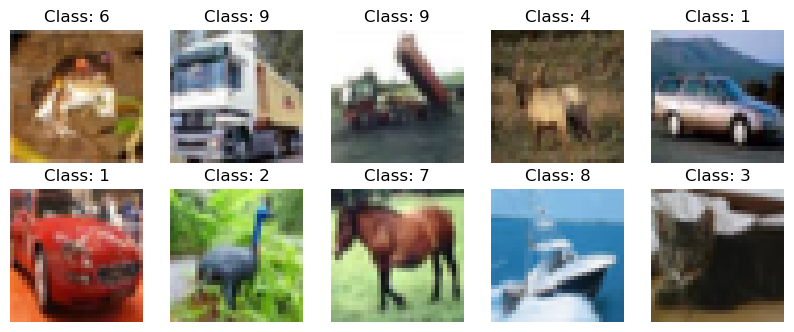

In [30]:
# Display 10 images in a grid
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.show()

## View images in x_test before Normalization 

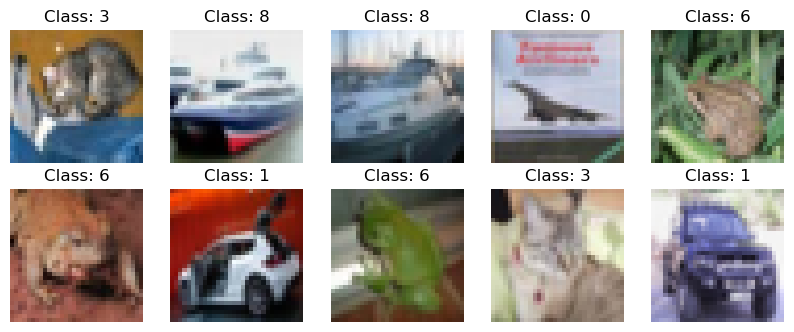

In [31]:
# Display 10 images in a grid
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Class: {y_test[i][0]}")
    plt.axis('off')
plt.show()

## Preprocessing and Normalization  

In [9]:
# Rescale the data to a range between 0 and 1 by dividing the data by 255 

In [20]:
preprocessed_x_train = x_train/255
preprocessed_x_test = x_test/255

## View Preprocessed Images against Original 

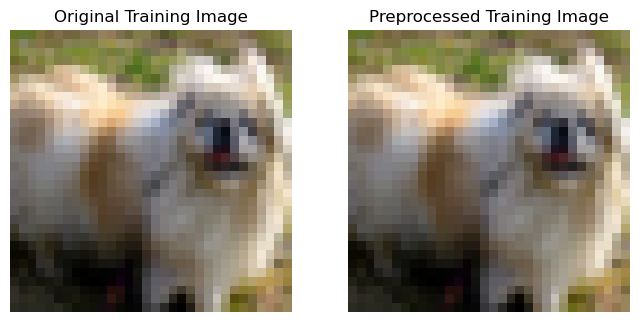

In [34]:
# Display example of preprocessed image
index = 40
plt.figure(figsize=(8, 5))

# Original training image
plt.subplot(1, 2, 1)
plt.title('Original Training Image')
plt.imshow(x_train[index])
plt.axis('off')

# Preprocessed training image
plt.subplot(1, 2, 2)
plt.title('Preprocessed Training Image')
plt.imshow(preprocessed_x_train[index])
plt.axis('off')

plt.show()

# Build Neural Network 

The model architecture is suitable for image classification tasks with input images of size 32x32 pixels and three color channels. The output layer has 10 neurons, corresponding to the 10 classes in the classification task, and produces class probabilities using softmax activation.

In [35]:
# Define the Sequential model and params
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# fit the model 
model.fit (x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2886 - loss: 2.8541
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5052 - loss: 1.3970
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5745 - loss: 1.2018
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6255 - loss: 1.0748
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6596 - loss: 0.9790


In [38]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6408 - loss: 1.0527


[1.0416934490203857, 0.6424999833106995]

# Conclusion and Analysis 

## Training:
After 5 epochs, the training accuracy increases steadily from around 28.86% to 65.96%.
The training loss decreases from 2.8541 to 0.9790, indicating that the model is learning and improving over the epochs.

## Evaluation: 
On the test set (x_test and y_test), the model achieves an accuracy of approximately 64.08% and a loss of approximately 1.0527.
The evaluation results on the test set are slightly lower than the training accuracy and higher than the training loss, which suggests that the model might be slightly overfitting to the training data.

## Analysis: 
The model has learned to classify images to some extent, achieving a decent accuracy on the CIFAR-10 dataset.

The training and evaluation results indicate that the model is learning and improving, but there might be some degree of overfitting.

Further experimentation with different architectures, hyperparameters, and regularization techniques (such as dropout) could potentially improve the model's performance and reduce overfitting.

Overall, the model demonstrates a reasonable performance on the CIFAR-10 dataset, but there is room for improvement.